<a href="https://colab.research.google.com/github/AbdillahHalim/Customer-personality-data-Clustering-Classification/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Abdillah_Halim_Hanafi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


**Customer Personality Analysis**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Attributes :


1. People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


2. Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


3. Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


4. Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2


# **3. Memuat Dataset**

In [3]:
# import dataset
df = pd.read_csv("/content/drive/MyDrive/dicoding/marketing_campaign.csv", delimiter="\t")

In [4]:
# menampilkan 5 baris awal dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
# menampilkan 5 baris terakhir dari dataset untuk melihat jumlah baris
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# **4. Exploratory Data Analysis (EDA)**



In [7]:
# menampilkan 5 baris awal dataset
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
# menampilkan ringkasan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# menampilkan ringkasan deskriptif statistik dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
# memeriksa total Na value di dataset
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [11]:
# memeriksa nilai duplikat di dataset
df.duplicated().sum()

0

In [12]:
# menampilkan frekuensi kemunculan nilai pada kolom Z_CostContact
df['Z_CostContact']

,Z_CostContact
0,3
1,3
2,3
3,3
4,3
...,...
2235,3
2236,3
2237,3
2238,3


In [13]:
# menampilkan frekuensi kemunculan nilai pada kolom Z_CostContact
df['Z_Revenue']

,Z_Revenue
0,11
1,11
2,11
3,11
4,11
...,...
2235,11
2236,11
2237,11
2238,11


In [14]:
# menampilkan nilai pada kolom Response
df['Response']

,Response
0,1
1,0
2,0
3,0
4,0
...,...
2235,0
2236,0
2237,0
2238,0


In [15]:
# menampilkan frekuensi kemunculan nilai pada kolom Education
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [16]:
# menampilkan frekuensi kemunculan nilai pada kolom Marital_Status
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [17]:
# menampilkan nilai unique pada kolom Dt_customer
df['Dt_Customer'].unique()

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11-05-2013', '29-10-2012', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '05-11-2013', '02-10-2013', '28-06-2014',
       '09-11-2012', '24-05-2013', '01-01-2014', '08-11-2012',
       '12-05-2014', '11-08-2012', '07-06-2014', '12-06-2013',
       '19-11-2012', '02-04-2013', '28-04-2014', '17-06-2013',
       '03-03-2014', '04-07-2013', '07-09-2012', '18-02-2013',
       '11-06-2013', '06-12-2013', '21-05-2013', '11-05-2014',
       '19-03-2014', '27-09-2013', '08-04-2013', '11-09

In [18]:
# menampilkan frekuensi kemunculan nilai pada kolom Dt_Customer
df['Dt_Customer'].value_counts()

,count
Dt_Customer,
31-08-2012,12
12-09-2012,11
14-02-2013,11
12-05-2014,11
20-08-2013,10
...,...
05-08-2012,1
18-11-2012,1
25-05-2013,1


In [19]:
# menampilkan frekuensi kemunculan nilai pada kolom Complain
df['Complain'].value_counts()

,count
Complain,
0,2219
1,21


In [20]:
# menampilkan frekuensi kemunculan nilai pada kolom Kidhome
df['Kidhome'].value_counts()

,count
Kidhome,
0,1293
1,899
2,48


In [21]:
# menampilkan frekuensi kemunculan nilai pada kolom Teenhome
df['Teenhome'].value_counts()

,count
Teenhome,
0,1158
1,1030
2,52


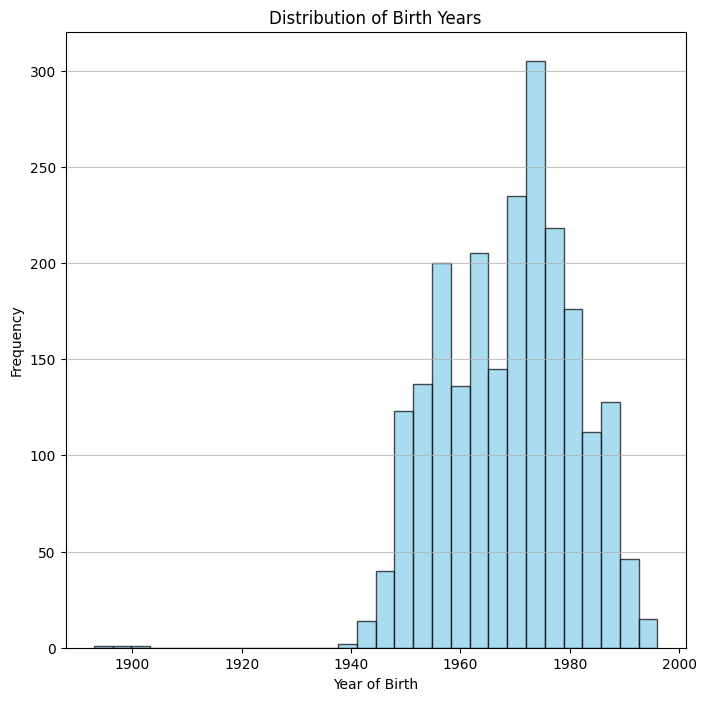

In [22]:
# membuat plot yang akan menampilkan frekuensi dan distribusi tahun kelahiran
plt.figure(figsize=(8, 8))
plt.hist(df['Year_Birth'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Years')
plt.grid(axis='y', alpha=0.75)

# menampilkan plot
plt.show()

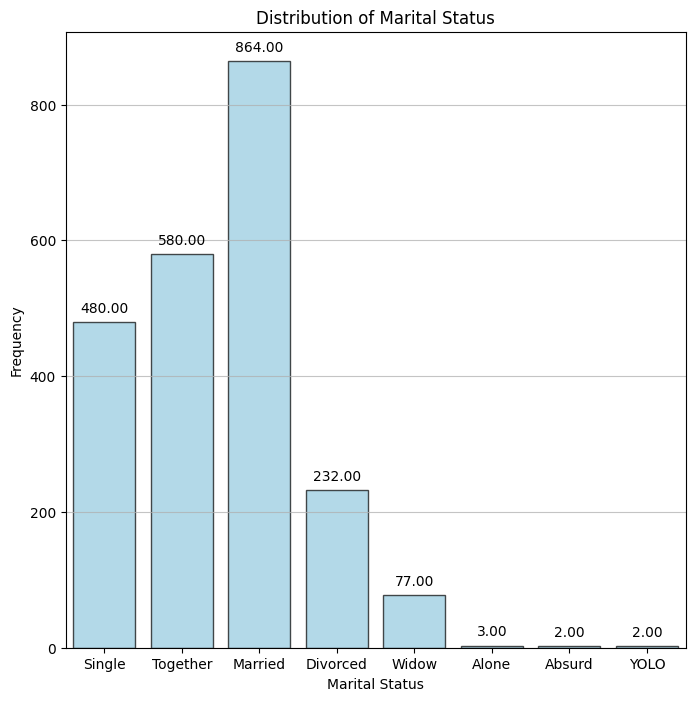

In [23]:
# membuat plot yang akan menampilkan frekuensi dan distribusi Marital Status
plt.figure(figsize=(8, 8))
sns.countplot(x='Marital_Status', data=df, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Distribution of Marital Status')
plt.grid(axis='y', alpha=0.75)

# membuat anotasi untuk label setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# menampilkan plot
plt.show()

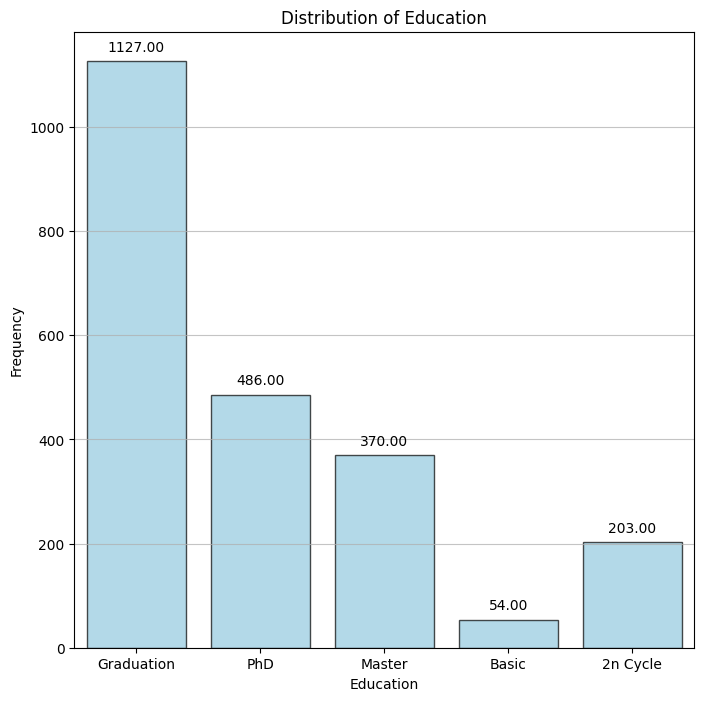

In [24]:
# membuat plot yang akan menampilkan frekuensi dan distribusi pada kolom Education
plt.figure(figsize=(8, 8))
sns.countplot(x='Education', data=df, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Education') # Corrected x-axis label
plt.ylabel('Frequency')
plt.title('Distribution of Education') # Corrected title
plt.grid(axis='y', alpha=0.75)

# membuat anotasi untuk label setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# menampilkan plot
plt.show()

In [25]:
# membuat data baru yang berisi jenis produk dan jumlah pembeliannya
dfCount = df[['MntFishProducts','MntFruits','MntGoldProds','MntMeatProducts','MntSweetProducts','MntWines']].sum().reset_index()

# memberikan nama kolom
dfCount.columns = ['Product','Total']

# menampilkan data
dfCount

,Product,Total
0,MntFishProducts,84057
1,MntFruits,58917
2,MntGoldProds,98609
3,MntMeatProducts,373968
4,MntSweetProducts,60621
5,MntWines,680816


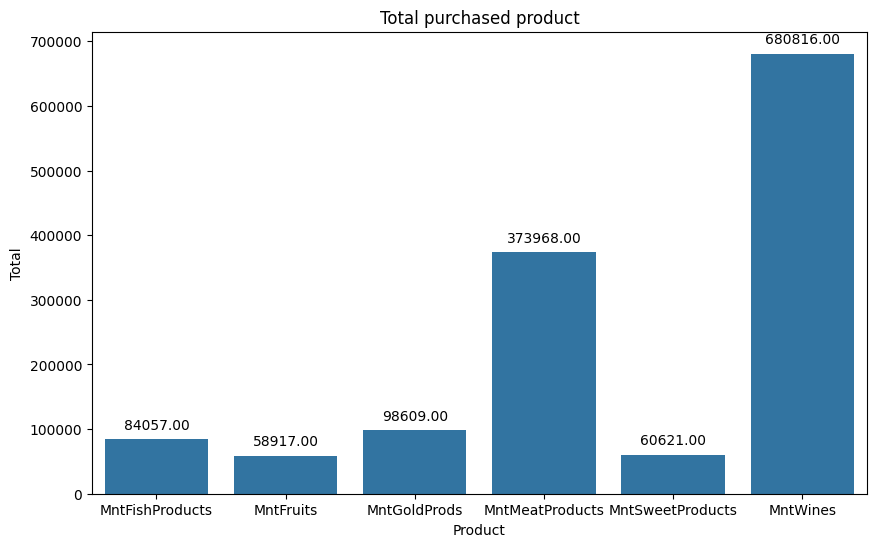

In [26]:
# membuat plot untuk melihat jumlah pembelian setiap produk
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Total', data=dfCount)
plt.title('Total purchased product')
plt.xlabel('Product')
plt.ylabel('Total')

# membuat anotasi untuk label setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# menampilkan plot
plt.show()

**Insight :**

- Wines merupakan produk yang paling banyak dibeli, kemungkinan wine memiliki pengaruh besar terhadap total pengeluaran pelanggan.
- kebanyakan lahir di tahun 1940 - 1999, dan kebanyakan telah memiliki pasangan
- sebagian besar pelanggan juga merupakan Lulusan

## Eksplorasi variabel Income berdasarkan Marital Status dan Education

### Berdasarkan Marital Status

In [27]:
# menampilkan data jumlah dan rata-rata Income berdasarkan Marital_Status
df.groupby(by=['Marital_Status']).agg({"Income" :["sum", "mean"]})

Income              
                       sum          mean
Marital_Status                          
Absurd            144731.0  72365.500000
Alone             131367.0  43789.000000
Divorced        12257541.0  52834.228448
Married         44328307.0  51724.978996
Single          24018810.0  50995.350318
Together        30509691.0  53245.534031
Widow            4292598.0  56481.552632
YOLO               96864.0  48432.000000

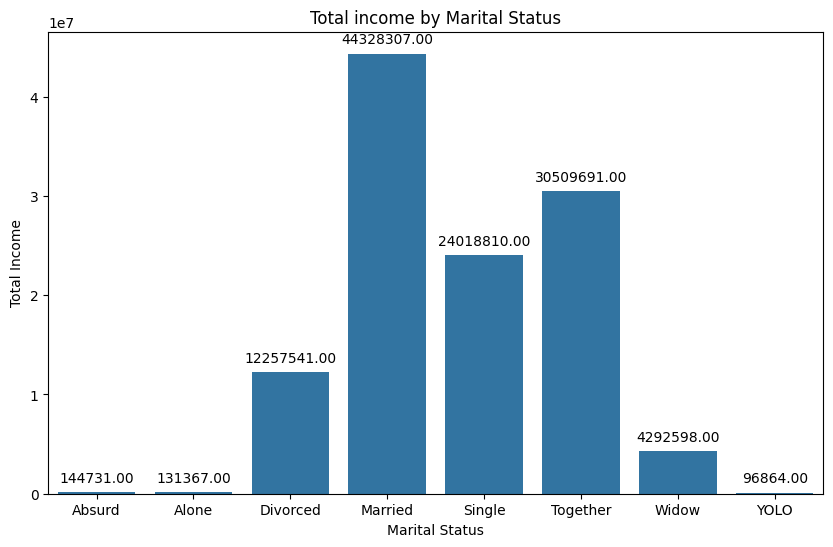

In [28]:
# membuat plot untuk melihat total income berdasarkan Marital_Status
totalIncomeMartial = df.groupby(by=['Marital_Status']).agg({"Income" : "sum"})
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Income', data=totalIncomeMartial)
plt.title('Total income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Income')

# membuat anotasi untuk label setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# menampilkan plot
plt.show()

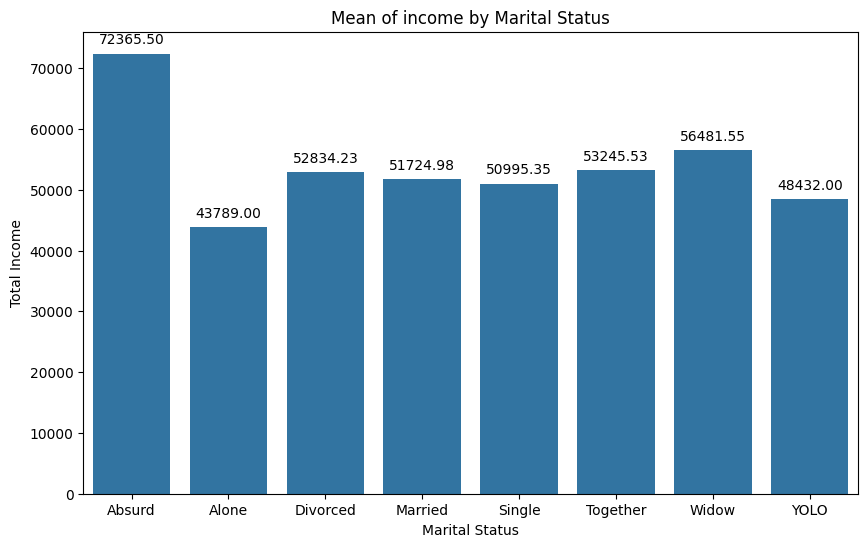

In [29]:
# membuat plot rata-rata Income berdasarkan Marital_Status
meanIncomeMartial = df.groupby(by=['Marital_Status']).agg({"Income" : "mean"})
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Income', data=meanIncomeMartial)
plt.title('Mean of income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Income')

# membuat anotasi untuk label setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# menampilkan plot
plt.show()

In [30]:
# menampilkan data jumlah dan rata-rata Income berdasarkan Marital_Status dan Education
df.groupby(by=['Marital_Status', 'Education']).agg({"Income" :["count","sum","mean","median"]})

Income                                   
                           count         sum          mean   median
Marital_Status Education                                           
Absurd         Graduation      1     79244.0  79244.000000  79244.0
               Master          1     65487.0  65487.000000  65487.0
Alone          Graduation      1     34176.0  34176.000000  34176.0
               Master          1     61331.0  61331.000000  61331.0
               PhD             1     35860.0  35860.000000  35860.0
Divorced       2n Cycle       23   1136088.0  49395.130435  49118.0
               Basic           1      9548.0   9548.000000   9548.0
               Graduation    119   6488599.0  54526.042017  55635.0
               Master         37   1862282.0  50331.945946  49476.0
               PhD            52   2761024.0  53096.615385  50613.5
Married        2n Cycle       80   3696088.0  46201.100000  46462.5
               Basic          20    439210.0  21960.500000  22352.0
               Graduation    429  21793311.0  50800.258741  50737.0
               Master        138   7353472.0  53286.028986  53088.5
               PhD           190  11046226.0  58138.031579  57081.5
Single         2n Cycle       36   1932262.0  53673.944444  48668.5
               Basic          18    328296.0  18238.666667  16383.0
               Graduation    246  12625257.0  51322.182927  49973.5
               Master         75   4014792.0  53530.560000  49494.0
               PhD            96   5118203.0  53314.614583  50198.0
Together       2n Cycle       56   2505239.0  44736.410714  45774.0
               Basic          14    297361.0  21240.071429  23179.0
               Graduation    285  15891167.0  55758.480702  53977.0
               Master        102   5315119.0  52109.009804  49736.0
               PhD           116   6500805.0  56041.422414  56756.0
Widow          2n Cycle        5    256961.0  51392.200000  47682.0
               Basic           1     22123.0  22123.000000  22123.0
               Graduation     35   1924183.0  54976.657143  58275.0
               Master         11    642417.0  58401.545455  51529.0
               PhD            24   1446914.0  60288.083333  57032.0
YOLO           PhD             2     96864.0  48432.000000  48432.0

### Berdasarkan Education

In [31]:
# menampilkan data jumlah dan rata-rata Income berdasarkan Education
df.groupby(by=['Education']).agg({"Income" :["sum", "mean"]})

Income              
                   sum          mean
Education                           
2n Cycle     9526638.0  47633.190000
Basic        1096538.0  20306.259259
Graduation  58835937.0  52720.373656
Master      19314900.0  52917.534247
PhD         27005896.0  56145.313929

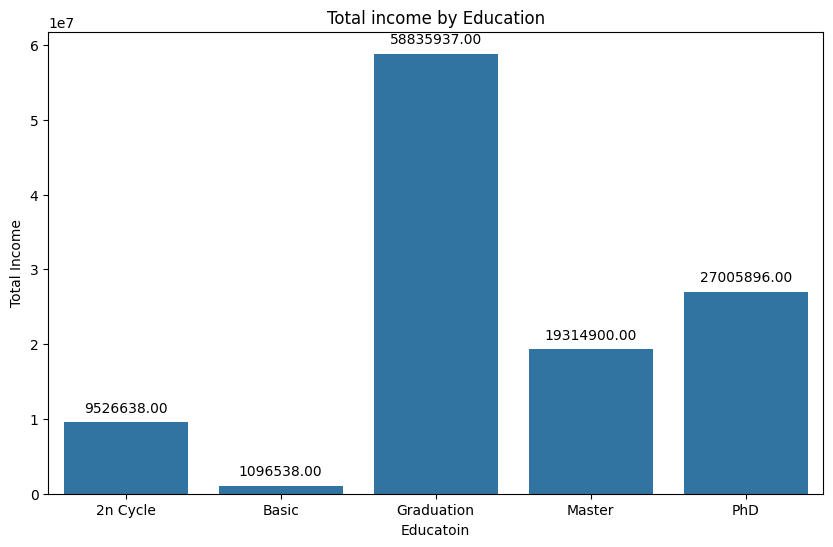

In [32]:
# membuat plot untuk menampilkan total income berdasarkan Education
totalIncomeEducation = df.groupby(by=['Education']).agg({"Income" : "sum"})
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', data=totalIncomeEducation)
plt.title('Total income by Education')
plt.xlabel('Educatoin')
plt.ylabel('Total Income')

# membuat anotasi untuk label setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# menampilkan plot
plt.show()

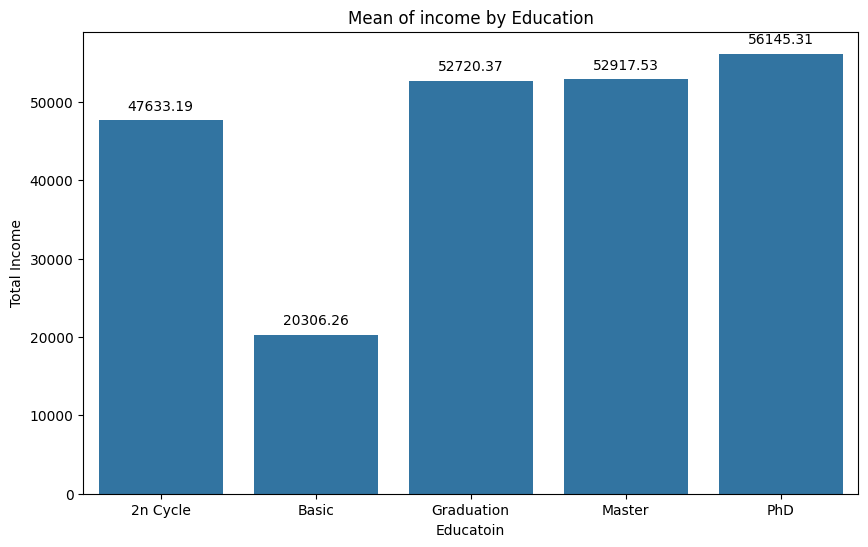

In [33]:
# membuat plot untuk menampilkan rata-rata Income berdasarkan Education
meanIncomeEducation = df.groupby(by=['Education']).agg({"Income" : "mean"})
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', data=meanIncomeEducation)
plt.title('Mean of income by Education')
plt.xlabel('Educatoin')
plt.ylabel('Total Income')

# membuat anotasi untuk label setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# menampilkan plot
plt.show()

## Checking Correlation

In [34]:
# inisiasi fungis label endocer
label = LabelEncoder()

# menyalin data dan membuat data baru
df_encoded = df.copy()

# menerapkan label encoder untuk mengubah nilai kategorik menjadi nilai numerik
for col in df_encoded.select_dtypes(include='O').columns:
    df_encoded[col]=label.fit_transform(df_encoded[col])

In [35]:
# membuat data correlation dari data yang sebelumnya di encode
correlation = df_encoded.corr()

# menampilkan data
correlation

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,-0.003839,0.019580,0.013095,0.002406,-0.002580,-0.030924,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.171390,-0.060580,-0.161791,0.230176,-0.352111,-0.008510,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Education,-0.003839,-0.171390,1.000000,0.007090,0.120692,-0.045564,0.118485,0.017878,-0.011728,0.197576,-0.080412,0.033625,-0.112223,-0.105217,-0.095489,0.030075,0.081908,0.070782,0.070483,-0.040281,0.005836,0.053266,0.033346,-0.010845,0.021369,-0.050540,NaN,NaN,0.090819
Marital_Status,0.019580,-0.060580,0.007090,1.000000,0.021353,-0.022553,-0.003596,-0.015492,0.014159,0.008205,0.000593,0.030689,0.035808,0.017382,0.001688,-0.021772,-0.001894,0.015125,0.001412,-0.031210,-0.027113,0.014381,0.012817,-0.017097,0.018417,-0.005718,NaN,NaN,-0.011403
Income,0.013095,-0.161791,0.120692,0.021353,1.000000,-0.428669,0.019133,-0.031425,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.045564,-0.022553,-0.428669,1.000000,-0.036133,-0.002199,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.118485,-0.003596,0.019133,-0.036133,1.000000,0.005078,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Dt_Customer,-0.030924,-0.008510,0.017878,-0.015492,-0.031425,-0.002199,0.005078,1.000000,0.011171,0.000855,-0.020819,-0.011888,-0.018528,0.001095,0.001157,-0.010121,0.008247,-0.025809,-0.004105,0.026401,-0.003613,0.004271,-0.024206,0.003034,0.024262,-0.011827,NaN,NaN,-0.008263
Recency,-0.046524,-0.019871,-0.011728,0.014159,-0.003970,0.008827,0.016198,0.011171,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.197576,0.008205,0.578650,-0.496297,0.004846,0.000855,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254


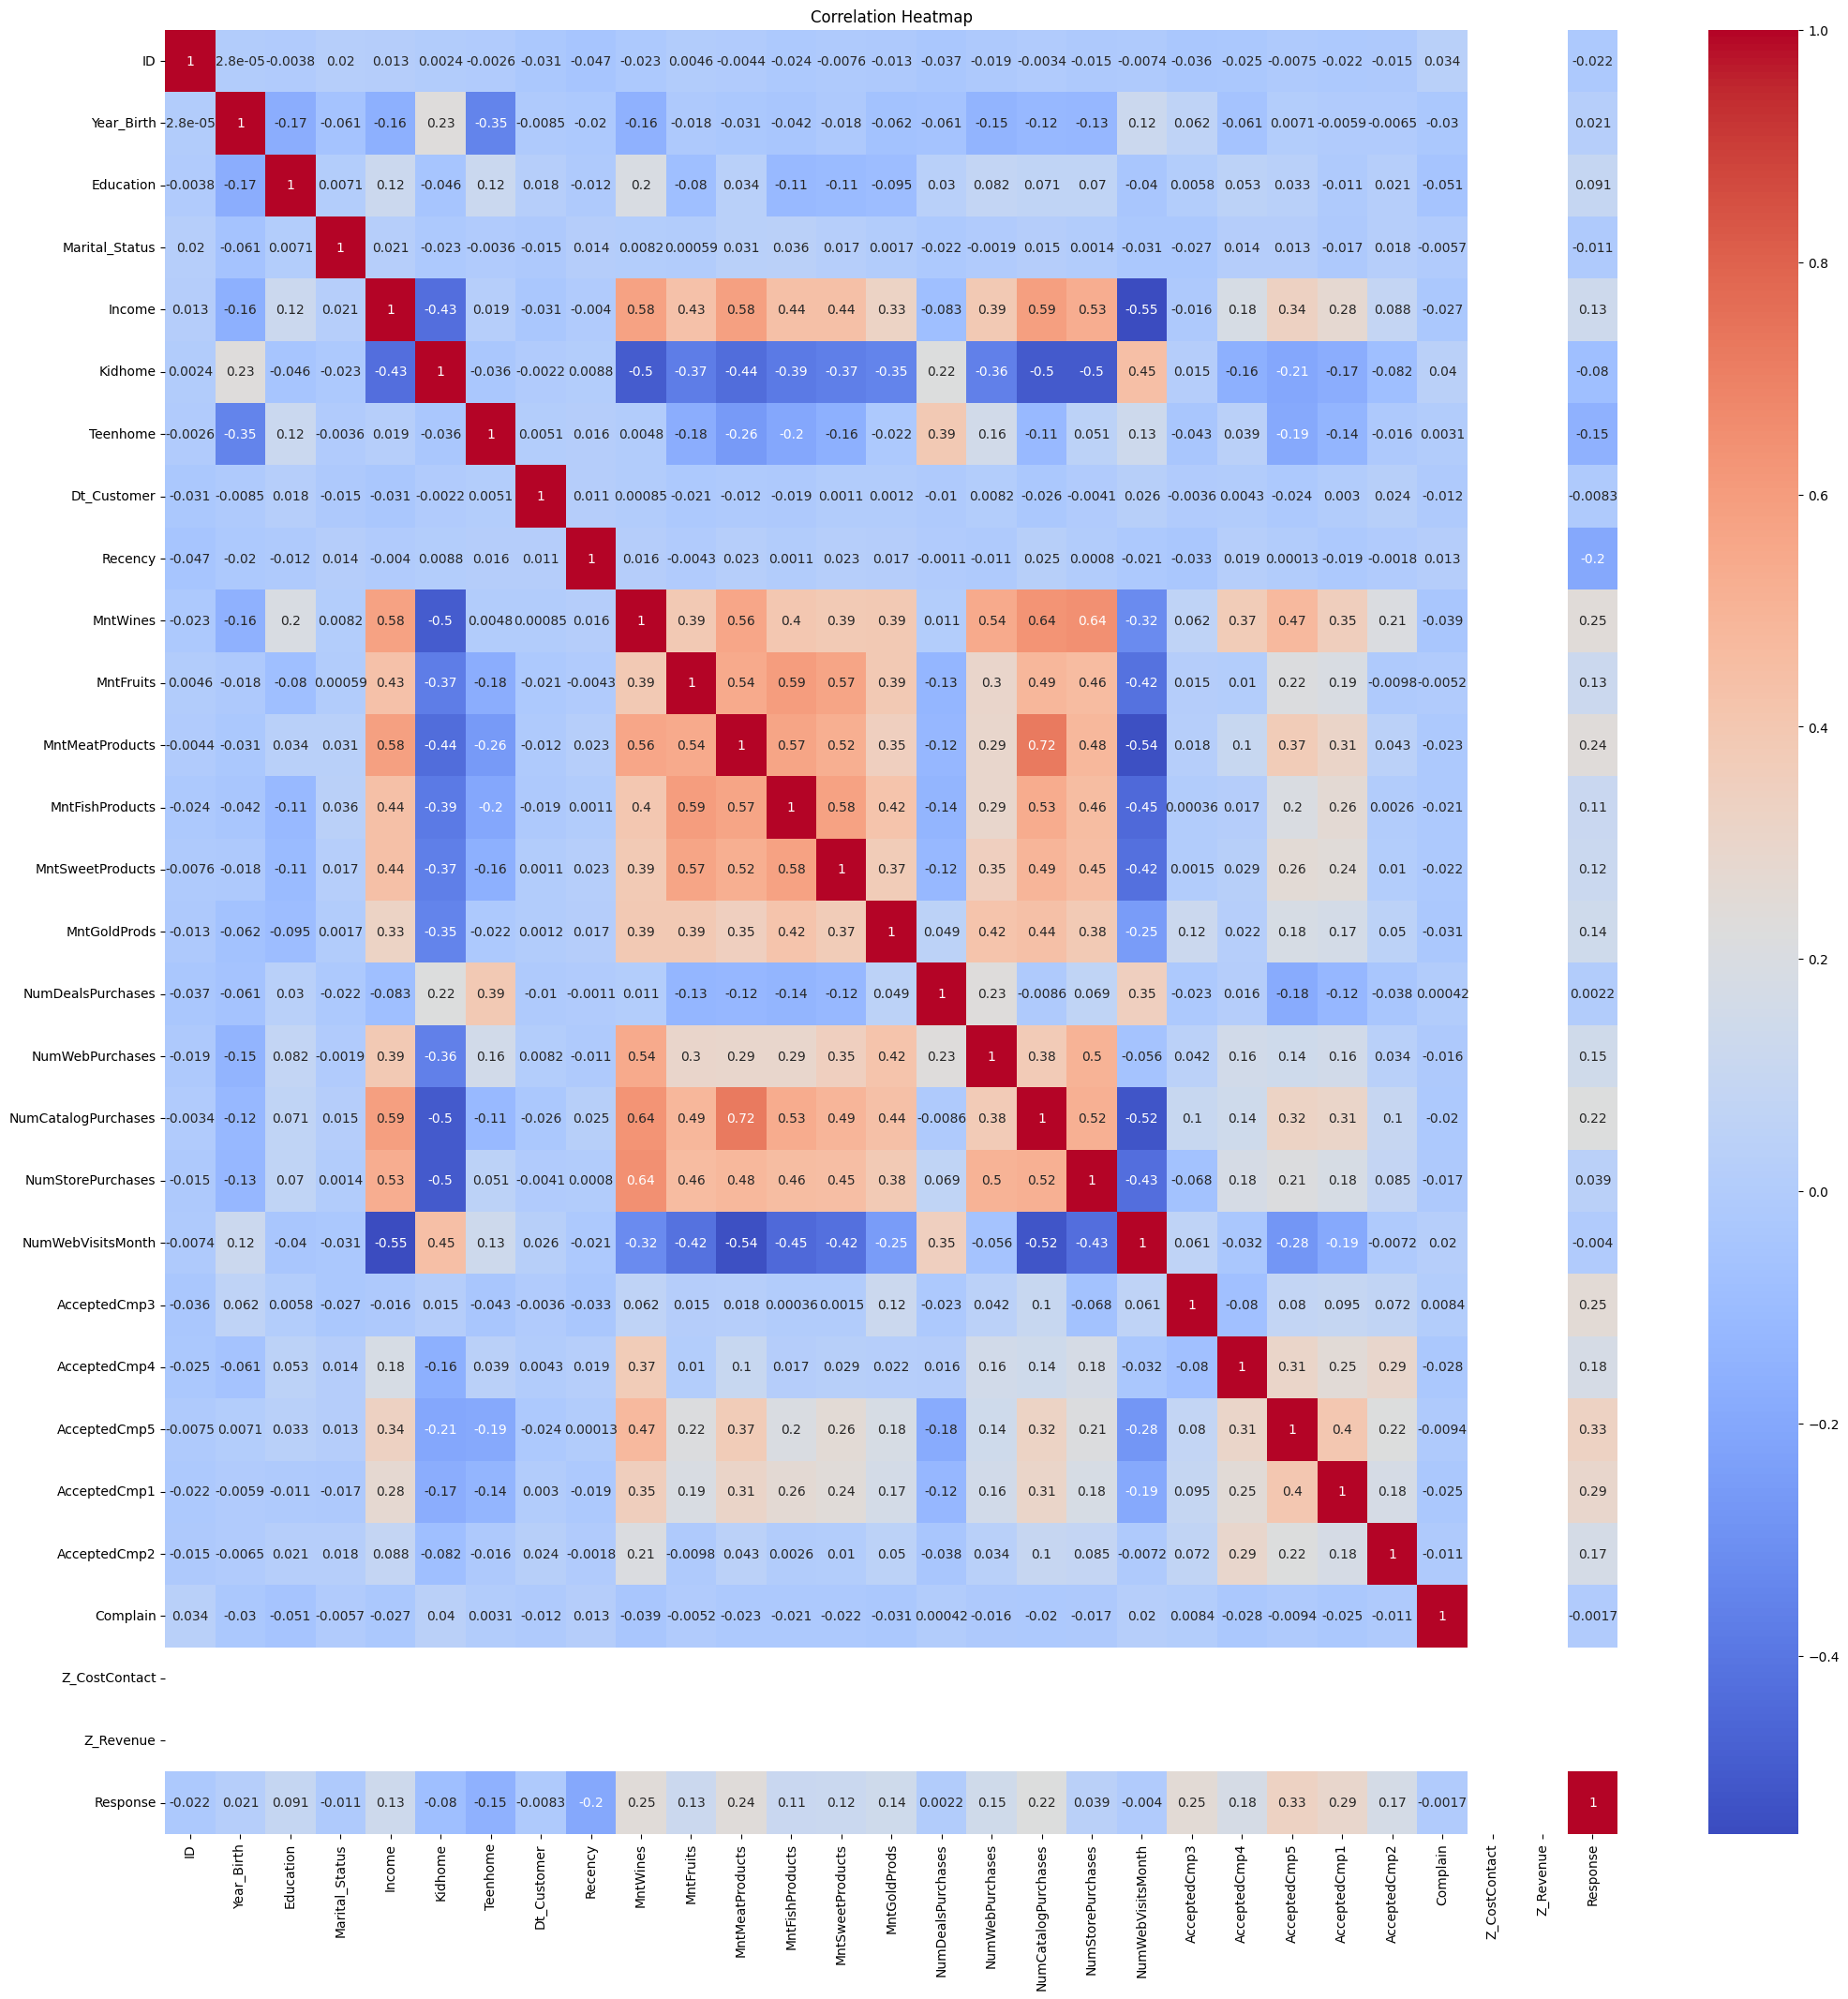

In [36]:
# membuat plot untuk menampilkan korelasi menggunakan heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# menampilkan plot
plt.show()

### **Insight :**       
- Korelasi antar variabel :
  1. Variabel Income memiliki korelasi yang kuat dengan data transaksi seperti jumlah pembelian produk, tempat transaksi yang dilakukan dan campaign yang diterima
  2. Variabel Kidhome dan Teenhome yang menandakan customer memiliki keluarga memiliki korelasi yang kuat dengan pembelian melalui discount dan jumlah kunjungan website
  3. Setiap variabel product memiliki korelasi yang kuat satu sama lain, variabel product juga memiliki korelasi yang kuat dengan tempat tempat transaksi dan campaign yang diterima
  4. Variabel pembelian menggunakan dsicount memiliki korelasi yang kuat dengan pembelian melalui website dan jumlah kunjungan melalui website
  

## Ekplorasi Missing value

In [37]:
# menampilkan total missing value di setiap kolom
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [38]:
# menampilkan frekuensi kemunculan nilai pada kolom income
df['Income'].value_counts()

,count
Income,
7500.0,12
35860.0,4
37760.0,3
83844.0,3
63841.0,3
...,...
40760.0,1
41452.0,1
6835.0,1


In [39]:
# membuat data yang berisikan kolom yang memiliki Na value
df_na = df[df['Income'].isnull()]

# menampilkan data
df_na

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [40]:
# menampilkan data Na value pada kolom income berdasarkan Marital_Status dan Education
df_na.groupby(by=['Marital_Status', 'Education']).agg({"Income" :["count"]})

Income
                           count
Marital_Status Education        
Married        2n Cycle        0
               Graduation      0
               PhD             0
Single         2n Cycle        0
               Graduation      0
               PhD             0
Together       2n Cycle        0
               Graduation      0
               Master          0
               PhD             0
Widow          Master          0

In [41]:
# menampilkan data pada kolom income berdasarkan Marital_Status dan Education
df.groupby(by=['Marital_Status', 'Education']).agg({"Income" :["count","sum","mean","median"]})

Income                                   
                           count         sum          mean   median
Marital_Status Education                                           
Absurd         Graduation      1     79244.0  79244.000000  79244.0
               Master          1     65487.0  65487.000000  65487.0
Alone          Graduation      1     34176.0  34176.000000  34176.0
               Master          1     61331.0  61331.000000  61331.0
               PhD             1     35860.0  35860.000000  35860.0
Divorced       2n Cycle       23   1136088.0  49395.130435  49118.0
               Basic           1      9548.0   9548.000000   9548.0
               Graduation    119   6488599.0  54526.042017  55635.0
               Master         37   1862282.0  50331.945946  49476.0
               PhD            52   2761024.0  53096.615385  50613.5
Married        2n Cycle       80   3696088.0  46201.100000  46462.5
               Basic          20    439210.0  21960.500000  22352.0
               Graduation    429  21793311.0  50800.258741  50737.0
               Master        138   7353472.0  53286.028986  53088.5
               PhD           190  11046226.0  58138.031579  57081.5
Single         2n Cycle       36   1932262.0  53673.944444  48668.5
               Basic          18    328296.0  18238.666667  16383.0
               Graduation    246  12625257.0  51322.182927  49973.5
               Master         75   4014792.0  53530.560000  49494.0
               PhD            96   5118203.0  53314.614583  50198.0
Together       2n Cycle       56   2505239.0  44736.410714  45774.0
               Basic          14    297361.0  21240.071429  23179.0
               Graduation    285  15891167.0  55758.480702  53977.0
               Master        102   5315119.0  52109.009804  49736.0
               PhD           116   6500805.0  56041.422414  56756.0
Widow          2n Cycle        5    256961.0  51392.200000  47682.0
               Basic           1     22123.0  22123.000000  22123.0
               Graduation     35   1924183.0  54976.657143  58275.0
               Master         11    642417.0  58401.545455  51529.0
               PhD            24   1446914.0  60288.083333  57032.0
YOLO           PhD             2     96864.0  48432.000000  48432.0

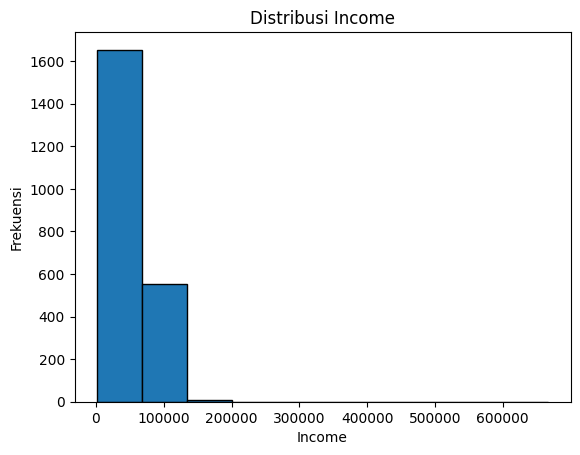

In [42]:
# membuat plot untuk menampilkan distribusi dari Income
plt.hist(df['Income'], bins=10, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frekuensi')
plt.title('Distribusi Income')

# menampilkan plot
plt.show()

In [43]:
# menampilkan skewness dari Income
print("Skewness :", df.Income.skew())

Skewness : 6.763487372811116


**Insight :**
-  Na value pada kolom income missing secara random
- Distribusi pada kolom income memiliki skewness positif yang cukup besar, yang berarti sebagian besar nilai pada kolom income berada di bagian kiri, oleh karena untuk mengganti Na value dengan median. Mean tidak lagi berada di pusat pada data yang skew, median (nilai tengah) biasanya lebih baik mewakili pusat data dibandingkan dengan mean.

# **5. Data Preprocessing**

In [44]:
# mengubah nama nilai pada kolom Marital_status
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

# mengubah nama nilai pada kolom Education
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

# mengubah nama kolom
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [45]:
# melihat frekuensi nilai pada kolom Marital_Status
df['Marital_Status'].value_counts()

,count
Marital_Status,
In couple,1444
Alone,796


In [46]:
# melihat frekuensi nilai pada kolom Marital_Status
df['Education'].value_counts()

,count
Education,
Postgraduate,1983
Undergraduate,257


## Handling missing value

In [47]:
# menampilkan jumlah missing value pada setiap kolom
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
Wines,0


In [48]:
# melakukan median imputation pada missing value di kolom Income
df['Income'].fillna(df['Income'].median(), inplace=True)
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
Wines,0


## Feature Engineering

### Feature Extraction

#### Total produk yang dibeli dari jumlah setiap produk

In [49]:
# melihat ringkasan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [50]:
# membuat kolom baru bernama spending dari total jumlah setiap kolom produk
df['spending'] = df[['Wines','Fruits','Meat','Fish','Sweets','Gold']].sum(axis=1)

# melihat frekuensi nilai pada kolom spending
df['spending']

,spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


#### Total campaign yang diterima dari jumlah setiap campaign

In [51]:
# membuat kolom baru bernama totalCampaignAccepted dari total jumlah setiap kolom AcceptedCmp
df['totalCampaignAccepted'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

# melihat frekuensi nilai pada kolom totalCampaignAc
df['totalCampaignAccepted'].value_counts()

,count
totalCampaignAccepted,
0,1777
1,325
2,83
3,44
4,11


#### Total transaksi yang dilakukan dari jumlah setiap tempat transaksi dilakukan

In [52]:
# membuat kolom baru bernama totalTransaction dari total jumlah setiap kolom pembelian
df['totalTransaction'] = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

# melihat frekuensi nilai pada kolom totalTransaction
df['totalTransaction'].value_counts()

,count
totalTransaction,
4,202
6,191
5,180
3,128
7,128
18,104
14,100
16,98
17,89


#### Total anak dengan jumlah dari Kidhome dan Teenhome

In [53]:
# membuat kolom baru bernama totalChildren dari total jumlah setiap kolom pembelian
df['totalChildren'] = df[['Kidhome','Teenhome']].sum(axis=1)

# melihat frekuensi nilai pada kolom totalCampaignAc
df['totalChildren'].value_counts()

,count
totalChildren,
1,1128
0,638
2,421
3,53


In [54]:
# melihat ringkasan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   Year_Birth             2240 non-null   int64  
 2   Education              2240 non-null   object 
 3   Marital_Status         2240 non-null   object 
 4   Income                 2240 non-null   float64
 5   Kidhome                2240 non-null   int64  
 6   Teenhome               2240 non-null   int64  
 7   Dt_Customer            2240 non-null   object 
 8   Recency                2240 non-null   int64  
 9   Wines                  2240 non-null   int64  
 10  Fruits                 2240 non-null   int64  
 11  Meat                   2240 non-null   int64  
 12  Fish                   2240 non-null   int64  
 13  Sweets                 2240 non-null   int64  
 14  Gold                   2240 non-null   int64  
 15  NumD

In [55]:
# membuat data baru untuk digunakan saat proses clustering
df_cluster = df[['Marital_Status','Education','Income', 'spending','totalTransaction','totalChildren']]

# menampilkan data
df_cluster

,Marital_Status,Education,Income,spending,totalTransaction,totalChildren
0,Alone,Postgraduate,58138.0,1617,22,0
1,Alone,Postgraduate,46344.0,27,4,2
2,In couple,Postgraduate,71613.0,776,20,0
3,In couple,Postgraduate,26646.0,53,6,1
4,In couple,Postgraduate,58293.0,422,14,1
...,...,...,...,...,...,...
2235,In couple,Postgraduate,61223.0,1341,16,1
2236,In couple,Postgraduate,64014.0,444,15,3
2237,Alone,Postgraduate,56981.0,1241,18,0
2238,In couple,Postgraduate,69245.0,843,21,1


In [56]:
# menampilkan ringkasan deskriptif statistik
df_cluster.describe()

,Income,spending,totalTransaction,totalChildren
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,605.798214,12.537054,0.950446
std,25037.955891,602.249288,7.205741,0.751803
min,1730.000000,5.000000,0.000000,0.000000
25%,35538.750000,68.750000,6.000000,0.000000
50%,51381.500000,396.000000,12.000000,1.000000
75%,68289.750000,1045.500000,18.000000,1.000000
max,666666.000000,2525.000000,32.000000,3.000000


## Outliers checking & handling

In [57]:
def diagnostic_plots(df, variable):
    """
    Fungsi ini membuat plot diagnostik untuk menjelajahi variabel tertentu dalam pandas DataFrame.

    Argumen:
    df ​​(pandas.DataFrame): DataFrame yang berisi data.
    variabel (str): Nama variabel yang akan dibuat plotnya.

    Pengembalian:
    Tidak ada

    Tampilan:
    - Histogram: Menunjukkan distribusi nilai variabel.
    - Boxplot: Memvisualisasikan kecenderungan sentral, sebaran, dan outlier potensial dari variabel.
    """
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

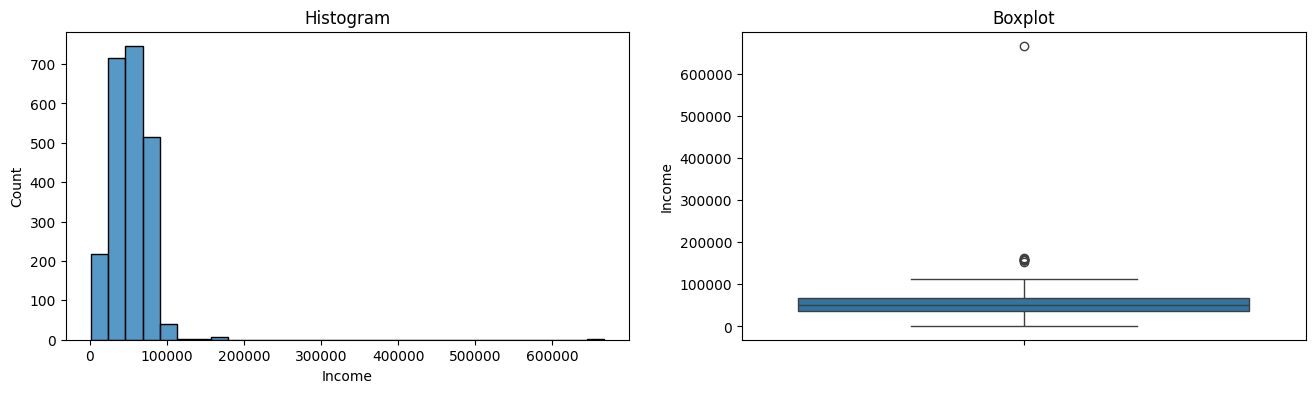

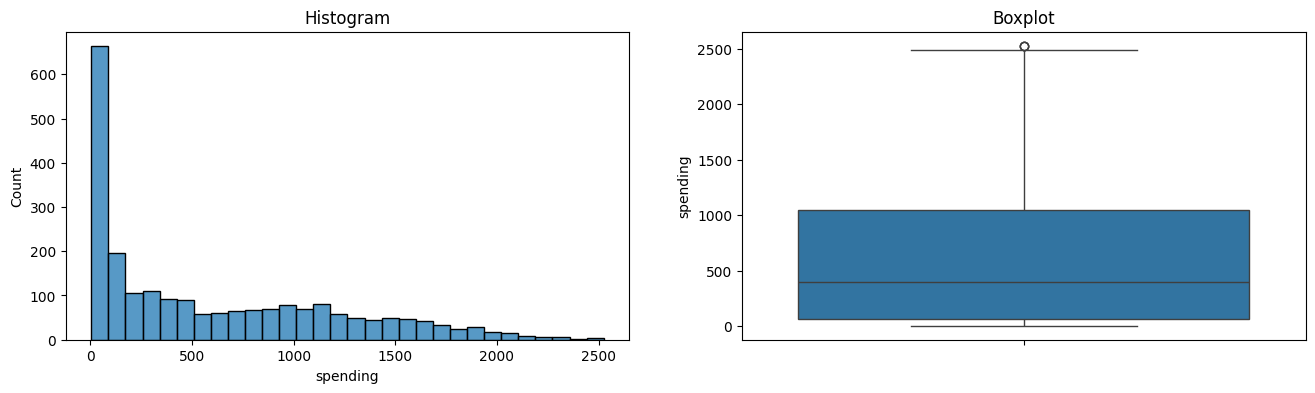

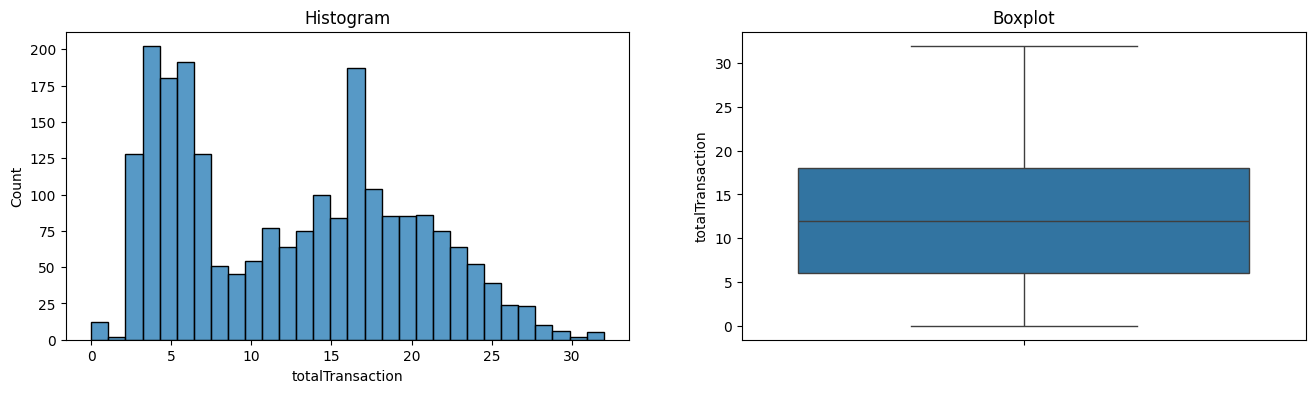

In [58]:
# menggunakan fungsi diagnostic plot untuk menampilkan histogram dan boxplot untuk memeriksa distribusi dan outlier
diagnostic_plots(df_cluster, 'Income')
diagnostic_plots(df_cluster, 'spending')
diagnostic_plots(df_cluster, 'totalTransaction')

In [59]:
# melihat rangkuman deskriptif statistik dari kolom Income
df['Income'].describe()

,Income
count,2240.000000
mean,52237.975446
std,25037.955891
min,1730.000000
25%,35538.750000
50%,51381.500000
75%,68289.750000
max,666666.000000


In [60]:
# melihat nilai maximum dari kolom Income
df_cluster['Income'].max()

666666.0

In [61]:
# membuat niali Q1 dan Q3 berdasarkan 0.25 dan 0.75 quantile
Q1 = df_cluster['Income'].quantile(0.25)
Q3 = df_cluster['Income'].quantile(0.75)

In [62]:
# menampilkan nilai Q3
Q3

68289.75

In [63]:
# menampilkan jumlah variabel pada kolom Income
print('Len variable : {}'.format(len(df_cluster['Income'])))

# menampilkan jumlah variabel yang melebihi nilai Q3
print('bigger than Q3   : {}'.format(len(df_cluster[df_cluster['Income'] > Q3])))
print('')

# menampilkan presentase variabel yang melebihi nilai Q3
print('% Bigger than Q3 : {}'.format(len(df_cluster[df_cluster['Income'] > Q3])/len(df_cluster['Income']) * 100))


Len variable : 2240
bigger than Q3   : 560

% Bigger than Q3 : 25.0


**Insight :**
- Data Income memiliki distribusi skew yang tinggi, outlier diatas quantile 0.75 sebanyak 25%, data tersebut merupakan bagian alami dari distribusi tersebut
- Data Income merupakan kondisi yang sebenarnya terjadi, seperti adanya individu dengan pendapatan sangat tinggi atau sangat rendah.

## Checking & handling skewness

Algoritma Kmeans sangat sensitif terhadap distribusi data, karena sebelumnya pada data Income memiliki skewness yang tinggi, pada data tersebut akan dilakukan transformasi untuk mengurangi tingkat skewness

In [64]:
# menampilkan skewness pada kolom income
df_cluster['Income'].skew()

6.800947406327349

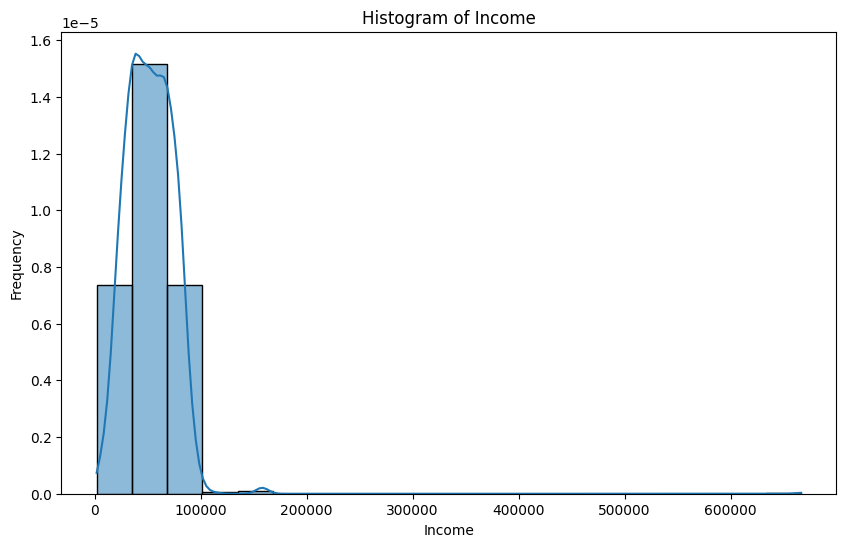

In [65]:
# membuat plot untuk menampilkan distribusi income dengan histogran
plt.figure(figsize=(10, 6))
sns.histplot(df_cluster['Income'],  kde=True, stat='density', bins=20, alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')

# menampilkan plot
plt.show()

In [66]:
# melakukan transformasi akar kuadrat
df_cluster['Income'] = np.sqrt(df_cluster['Income'])


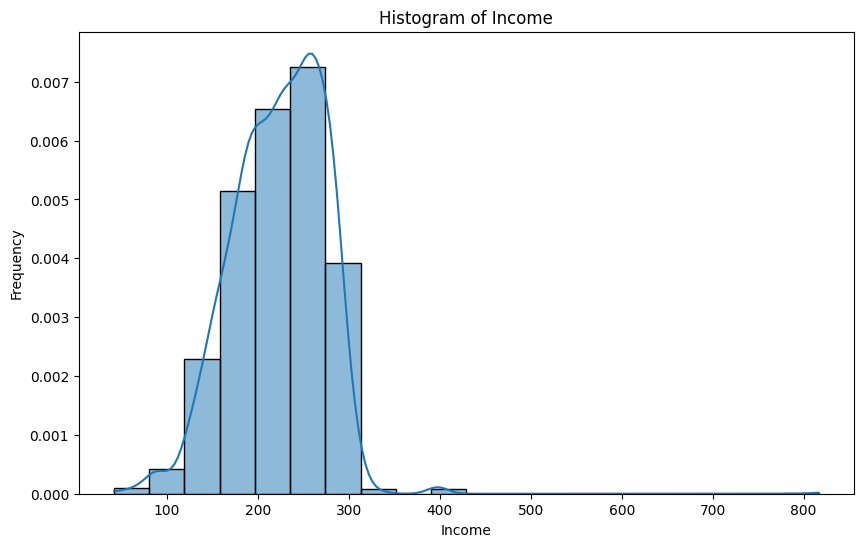

In [67]:
# membuat plot untuk menampilkan distribusi income setelah dilakukan transformasi
plt.figure(figsize=(10, 6))
sns.histplot(df_cluster['Income'],  kde=True, stat='density', bins=20, alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')

# menampilkan plot
plt.show()

In [68]:
# menampilkan skewness pada kolom income setelah dilakukan transformasi akar kuadarat
df_cluster['Income'].skew()

0.39363681787854476

## Checking & Handling Imbalance data

### Checking Imbalance data

In [69]:
# melihat frekuensi nilai pada kolom Marital_Status
df_cluster['Marital_Status'].value_counts()

,count
Marital_Status,
In couple,1444
Alone,796


In [70]:
class_counts = df_cluster['Marital_Status'].value_counts()
total_samples = class_counts.sum()

# Tentukan kelas majority dan minority serta persentasenya
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()
majority_percentage = (class_counts.max() / total_samples) * 100
minority_percentage = (class_counts.min() / total_samples) * 100

# Tampilkan hasil
print(f"Kelas Majority: {majority_class} {majority_percentage:.2f}%")
print(f"Kelas Minority: {minority_class} {minority_percentage:.2f}%")

Kelas Majority: In couple 64.46%
Kelas Minority: Alone 35.54%


In [71]:
# melihat frekuensi nilai pada kolom Education
df_cluster['Education'].value_counts()

,count
Education,
Postgraduate,1983
Undergraduate,257


In [72]:
class_counts = df_cluster['Education'].value_counts()
total_samples = class_counts.sum()

# Tentukan kelas majority dan minority serta persentasenya
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()
majority_percentage = (class_counts.max() / total_samples) * 100
minority_percentage = (class_counts.min() / total_samples) * 100

# Tampilkan hasil
print(f"Kelas Majority: {majority_class} {majority_percentage:.2f}%")
print(f"Kelas Minority: {minority_class} {minority_percentage:.2f}%")

Kelas Majority: Postgraduate 88.53%
Kelas Minority: Undergraduate 11.47%


In [73]:
# inisiasi label encoder sebagai label
label = LabelEncoder()

In [74]:
# menerapkan label encoder pada nilai kolom kategori
df_cluster['Education'] = label.fit_transform(df_cluster['Education'])
df_cluster['Marital_Status'] = label.fit_transform(df_cluster['Marital_Status'])

# melihat frekuensi nilai pada kolom Education
df_cluster['Education'].value_counts()

,count
Education,
0,1983
1,257


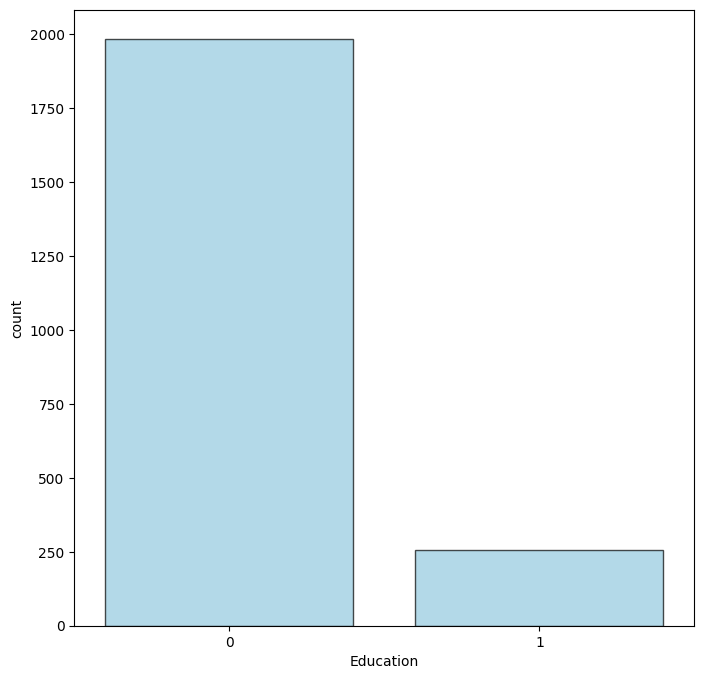

In [75]:
# membuat plot untuk menampilkan perbandingan nilai pada kolom education
plt.figure(figsize=(8, 8))
sns.countplot(x='Education', data=df_cluster, color='skyblue', edgecolor='black', alpha=0.7)

# menampilkan plot
plt.show()

### Handling Imbalance data

In [76]:
X = df_cluster.drop('Education', axis=1)
y = df_cluster['Education']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# menerapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# memeriksa data baru
print(pd.Series(y_resampled).value_counts())

Education
0    1589
1    1589
Name: count, dtype: int64


In [77]:
# membuat data baru dari data yang sebelumnya di sample menggunakan SMOTE
df_cluster = pd.concat([X_resampled, y_resampled], axis=1)

In [78]:
# melihat frekuensi nilai pada kolom Education
df_cluster['Education'].value_counts()

,count
Education,
0,1589
1,1589


## Binning

Perbandingan metode Binning menggunakan antara fungsi cut dan qcut

In [79]:
# melakukan binning pada kolom income menggunakan fungsi cut
pd.cut(df_cluster['Income'], 3, labels=["low", "middle", "high"]).value_counts()

,count
Income,
low,3128
middle,49
high,1


In [80]:
# melakukan binning pada kolom income menggunakan fungsi qcut
pd.qcut(df_cluster['Income'], 3, labels=["low", "middle", "high"]).value_counts()

,count
Income,
low,1060
high,1060
middle,1058


In [81]:
# melakukan binning pada kolom spending menggunakan fungsi qcut
pd.cut(df_cluster['spending'], 3, labels=["low", "middle", "high"]).value_counts()

,count
spending,
low,2338
middle,672
high,168


In [82]:
# melakukan binning pada kolom spending menggunakan fungsi qcut
pd.qcut(df_cluster['spending'], 3, labels=["low", "middle", "high"]).value_counts()

,count
spending,
low,1077
high,1060
middle,1041


Fungsi qcut membagi setiap bin dengan jumlah data yang sama, sehingga lebih baik dalam menangani data yang tidak seragam. Membuat model machine learning dapat belajar pola yang lebih representatif dari seluruh data.

In [83]:
# membuat kolom baru dengan menerapkan fungsi qcut pada kolom income dan spending
df_cluster['incomeCategory'] = pd.qcut(df_cluster['Income'], 3, labels=["low", "middle", "high"])
df_cluster['spendCategory'] = pd.qcut(df_cluster['spending'], 3, labels=["low", "middle", "high"])

# menampilkan data
df_cluster

,Marital_Status,Income,spending,totalTransaction,totalChildren,Education,incomeCategory,spendCategory
0,0,129.664953,50,5,0,0,low,low
1,0,253.359428,825,21,1,0,high,high
2,1,268.270386,1086,16,1,0,high,high
3,1,170.842032,34,4,1,0,low,low
4,1,66.543219,359,25,1,0,low,middle
...,...,...,...,...,...,...,...,...
3173,0,252.477320,585,14,1,1,high,middle
3174,0,253.737374,463,14,1,1,high,middle
3175,0,223.453627,368,11,1,1,middle,middle
3176,1,162.532205,55,5,1,1,low,low




## Encoding

In [84]:
# menampilkan data
df_cluster.head()

,Marital_Status,Income,spending,totalTransaction,totalChildren,Education,incomeCategory,spendCategory
0,0,129.664953,50,5,0,0,low,low
1,0,253.359428,825,21,1,0,high,high
2,1,268.270386,1086,16,1,0,high,high
3,1,170.842032,34,4,1,0,low,low
4,1,66.543219,359,25,1,0,low,middle


In [85]:
# menampilkan kolom incomeCategory dan spendCategory
df_cluster[['incomeCategory', 'spendCategory']]

,incomeCategory,spendCategory
0,low,low
1,high,high
2,high,high
3,low,low
4,low,middle
...,...,...
3173,high,middle
3174,high,middle
3175,middle,middle
3176,low,low


In [86]:
# melihat frekuensi nilai pada spendCategori
df_cluster['spendCategory'].value_counts()

,count
spendCategory,
low,1077
high,1060
middle,1041


In [87]:
# melihat frekuensi nilai pada incomeCategory
df_cluster['incomeCategory'].value_counts()

,count
incomeCategory,
low,1060
high,1060
middle,1058


In [95]:
# inisiasi ordinal encoder dengan categories sesuai dengan nilai kolom yang ingin di encoding
ordinal = OrdinalEncoder(categories = [["low", "middle", "high"]])

In [ ]:
# menerapkan label encoder pada kolom incomeCategory dan spendCategory
df_cluster['incomeCategory'] = ordinal.fit_transform(df_cluster[['incomeCategory']])
df_cluster['spendCategory'] = ordinal.fit_transform(df_cluster[['spendCategory']])

In [99]:
# menampilkan data
df_cluster.head()

,Marital_Status,Income,spending,totalTransaction,totalChildren,Education,incomeCategory,spendCategory
0,0,129.664953,50,5,0,0,0.0,0.0
1,0,253.359428,825,21,1,0,2.0,2.0
2,1,268.270386,1086,16,1,0,2.0,2.0
3,1,170.842032,34,4,1,0,0.0,0.0
4,1,66.543219,359,25,1,0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [100]:
#  mencari jumlah kelompok (cluster) yang paling optimal untuk data kita menggunakan algoritma K-Means.
inertia = []
for k in range(1, 9): # inisiasi perulangan dari 1 - 8
    model = KMeans(n_clusters=k, random_state=42) # Membuat model K-Means dengan jumlah kelompok sesuai dengan nilai k
    model.fit(df_cluster)
    inertia.append(model.inertia_)

# menampilkan hasil perulangan dalam bentuk dataframe
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 9)])
inertia_df

,Inertia
1,1.059940e+09
2,2.428574e+08
3,1.056221e+08
4,1.051793e+08
5,5.808072e+07
6,3.834153e+07
7,2.933095e+07
8,2.118583e+07


Text(0.5, 1.0, 'Elbow Method')

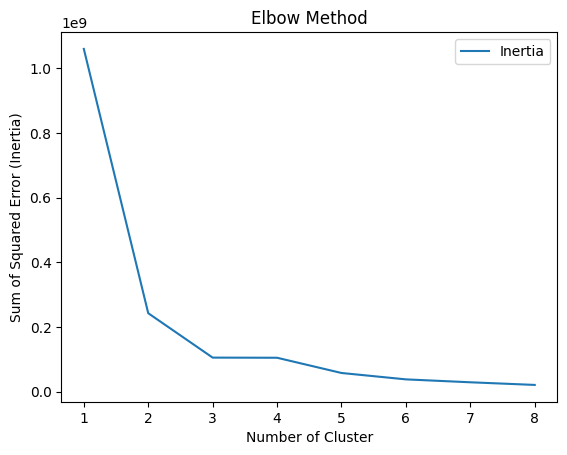

In [101]:
# membuat plot untuk menampilkan visualisasi hasil dari perhitungan inertia yang dilakukan sebelumnya
inertia_df.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

In [102]:
# inisiasi model KMeans dengan jumlah cluster =  2 dan random state sebanyak 42
modelKM = KMeans(n_clusters=2,random_state=42)
modelKM.fit(df_cluster)

KMeans(n_clusters=2, random_state=42)

In [103]:
# menerapkan model KMeans dengan data
modelKM.predict(df_cluster)

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [104]:
# membuat kolom baru berdasarkan cluster yang telah ditentukan
df_cluster['Cluster KM'] = modelKM.predict(df_cluster)

# menampilkan data
df_cluster

,Marital_Status,Income,spending,totalTransaction,totalChildren,Education,incomeCategory,spendCategory,Cluster KM
0,0,129.664953,50,5,0,0,0.0,0.0,0
1,0,253.359428,825,21,1,0,2.0,2.0,1
2,1,268.270386,1086,16,1,0,2.0,2.0,1
3,1,170.842032,34,4,1,0,0.0,0.0,0
4,1,66.543219,359,25,1,0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
3173,0,252.477320,585,14,1,1,2.0,1.0,0
3174,0,253.737374,463,14,1,1,2.0,1.0,0
3175,0,223.453627,368,11,1,1,1.0,1.0,0
3176,1,162.532205,55,5,1,1,0.0,0.0,0


## **b. Evaluasi Model Clustering**

In [105]:
# menghitung silhouette score dari hasil clustering yang dilakukan
siluet_km1 = silhouette_score(df_cluster.iloc[:, :-1], df_cluster['Cluster KM']) # mengambil semua kolom kecuali kolom terakhir dari DataFrame

# menampilkan score
siluet_km1

0.7088758682770647

## **c. Feature Selection**

In [106]:
# membagi dataset menjadi dua bagian fitur (X) dan label (y)
x = df_cluster.drop('Cluster KM', axis=1)
y = df_cluster['Cluster KM']

In [107]:
filter_selector = SelectKBest(score_func=chi2, k=5)  # Memilih 5 fitur terbaik berdasarkan skor chi-squared
filtered_df = filter_selector.fit_transform(x, y)
filtered_df = filter_selector.transform(x)

# menampilkan fitur yang dipilih
print("Fitur yang dipilih dengan Filter Methods:", filter_selector.get_support(indices=True))

Fitur yang dipilih dengan Filter Methods: [1 2 3 6 7]


In [108]:
# menampilkan nama kolom pada dataset
df_cluster.columns

Index(['Marital_Status', 'Income', 'spending', 'totalTransaction',
       'totalChildren', 'Education', 'incomeCategory', 'spendCategory',
       'Cluster KM'],
      dtype='object')

In [109]:
# membuat data baru dari kolom yang dipilih menggunakan filter
df_filtered = df_cluster[['Income', 'spending', 'totalTransaction', 'incomeCategory', 'spendCategory']]

# menampilkan data
df_filtered

,Income,spending,totalTransaction,incomeCategory,spendCategory
0,129.664953,50,5,0.0,0.0
1,253.359428,825,21,2.0,2.0
2,268.270386,1086,16,2.0,2.0
3,170.842032,34,4,0.0,0.0
4,66.543219,359,25,0.0,1.0
...,...,...,...,...,...
3173,252.477320,585,14,2.0,1.0
3174,253.737374,463,14,2.0,1.0
3175,223.453627,368,11,1.0,1.0
3176,162.532205,55,5,0.0,0.0


In [110]:
#  mencari jumlah kelompok (cluster) yang paling optimal untuk data kita menggunakan algoritma K-Means.
inertia = []
for k in range(1, 9): # inisiasi perulangan dari 1 - 8
    model = KMeans(n_clusters=k, random_state=42) # Membuat model K-Means dengan jumlah kelompok sesuai dengan nilai k
    model.fit(df_filtered)
    inertia.append(model.inertia_)

# menampilkan hasil perulangan dalam bentuk dataframe
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 9)])
inertia_df

,Inertia
1,1.059937e+09
2,2.428546e+08
3,1.056200e+08
4,1.051765e+08
5,5.807790e+07
6,3.833871e+07
7,2.932816e+07
8,2.118304e+07


Text(0.5, 1.0, 'Elbow Method')

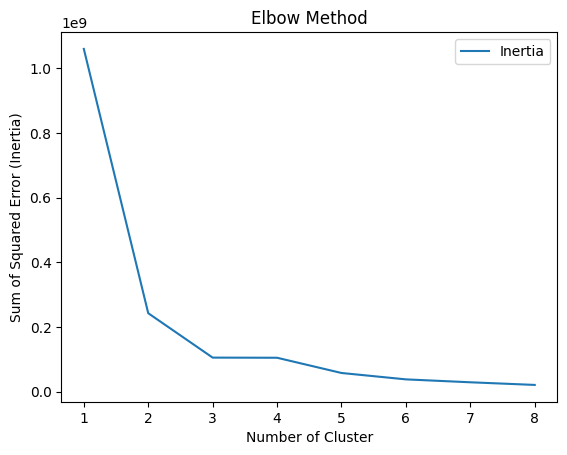

In [111]:
# membuat plot untuk menampilkan visualisasi hasil dari perhitungan inertia yang dilakukan sebelumnya
inertia_df.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

In [112]:
# inisiasi model KMeans dengan jumlah cluster =  2 dan random state sebanyak 42
modelKM = KMeans(n_clusters=2,random_state=42)
modelKM.fit(df_filtered)

KMeans(n_clusters=2, random_state=42)

In [113]:
# menerapkan model KMeans dengan data
modelKM.predict(df_filtered)

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [114]:
# membuat kolom baru berdasarkan cluster yang telah ditentukan
df_filtered['Cluster KM'] = modelKM.predict(df_filtered)

# menampilkan data
df_filtered

,Income,spending,totalTransaction,incomeCategory,spendCategory,Cluster KM
0,129.664953,50,5,0.0,0.0,0
1,253.359428,825,21,2.0,2.0,1
2,268.270386,1086,16,2.0,2.0,1
3,170.842032,34,4,0.0,0.0,0
4,66.543219,359,25,0.0,1.0,0
...,...,...,...,...,...,...
3173,252.477320,585,14,2.0,1.0,0
3174,253.737374,463,14,2.0,1.0,0
3175,223.453627,368,11,1.0,1.0,0
3176,162.532205,55,5,0.0,0.0,0


In [115]:
# menghitung silhouette score dari hasil clustering yang dilakukan
siluet_km2 = silhouette_score(df_filtered.iloc[:, :-1], df_filtered['Cluster KM']) # mengambil semua kolom kecuali kolom terakhir dari DataFrame

In [116]:
# menampilkan perbedaan silhouette score sebelum dan sesudah feature selection
print("silhouette score sebelum dilakukan feature selection:", siluet_km1)
print("silhouette score setelah dilakukan feature selection:", siluet_km2)

silhouette score sebelum dilakukan feature selection: 0.7088758682770647
silhouette score setelah dilakukan feature selection: 0.7088849282191476


## **d. Visualisasi Hasil Clustering**

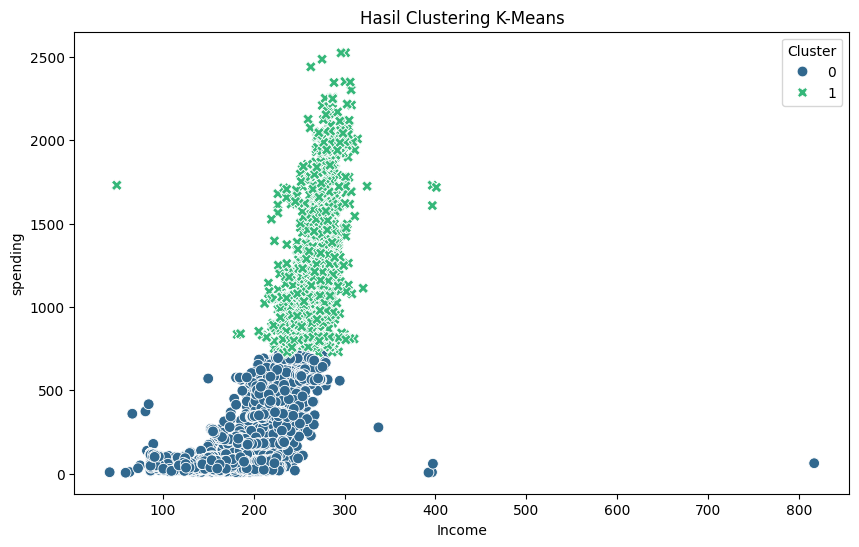

In [117]:
# membuat scatter plot untuk menampilkan
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_filtered.iloc[:, 0], # Mengambil nilai dari kolom pertama pada DataFrame
    y=df_filtered.iloc[:, 1], # Mengambil nilai dari kolom kedua pada DataFrame
    hue=df_filtered['Cluster KM'], # Menggunakan kolom 'Cluster KM' untuk menentukan warna setiap titik data
    palette='viridis',
    style=df_filtered['Cluster KM'],
    s=60
)
plt.title('Hasil Clustering K-Means')
plt.xlabel(df_filtered.columns[0])
plt.ylabel(df_filtered.columns[1])
plt.legend(title='Cluster')

# Menampilkan plot yang telah dibuat.
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [118]:
# menampilkan data dan di order berdasarkan kolom Cluster KM
df_filtered.sort_values(by='Cluster KM')

,Income,spending,totalTransaction,incomeCategory,spendCategory,Cluster KM
0,129.664953,50,5,0.0,0.0,0
1982,220.506392,385,11,1.0,1.0,0
1983,138.101478,63,5,0.0,0.0,0
1984,255.022886,566,16,2.0,1.0,0
1986,150.083689,67,5,0.0,0.0,0
...,...,...,...,...,...,...
788,249.373214,1283,17,2.0,2.0,1
789,273.643929,964,23,2.0,2.0,1
792,248.229732,1345,17,2.0,2.0,1
2121,268.479955,816,19,2.0,2.0,1


In [119]:
# menampilkan frekuensi kemunculan nilai pada kolom Cluster KM
df_filtered['Cluster KM'].value_counts()

,count
Cluster KM,
0,2179
1,999


In [120]:
# menampilkan nilai income dan spending berdasarkan Cluster KM
df_filtered.groupby(by=['Cluster KM','spendCategory','incomeCategory']).agg({"Income" :["count"],"spending":["count"]})

Income spending
                                         count    count
Cluster KM spendCategory incomeCategory                
0          0.0           0.0               765      765
                         1.0               306      306
                         2.0                 6        6
           1.0           0.0               293      293
                         1.0               579      579
                         2.0               169      169
           2.0           1.0                39       39
                         2.0                22       22
1          2.0           0.0                 2        2
                         1.0               134      134
                         2.0               863      863

In [121]:
# menampilkan nilai income berdasarkan Cluster KM
df_filtered.groupby(by=['Cluster KM','incomeCategory']).agg({"Income" :["count"]})

Income
                           count
Cluster KM incomeCategory       
0          0.0              1058
           1.0               924
           2.0               197
1          0.0                 2
           1.0               134
           2.0               863

In [126]:
# menampilkan nilai spending berdasarkan Cluster KM
df_filtered.groupby(by=['Cluster KM']).agg({"spending":["mean"]})

,spending
,mean
Cluster KM,
0,173.936668
1,1262.965966


Dikarenakan nilai dari kolom Cluster KM merupakan kelompok dari pelanggan dengan perilaku spending yang telah dibagi menjadi 2, maka nilai Cluster KM sudah mewakili kategori spending, dan kolom spendCategory akan dihapus dari dataset.

In [123]:
df_filtered = df_filtered.drop('spendCategory', axis=1)

1. Cluster 0: Low spending customer
- Cluster ini mungkin mewakili pelanggan dengan daya beli yang lebih terbatas, dikarenakan di dominasi oleh pelanggan yang berpendapatan menengah dan rendah. Mereka mungkin lebih sensitif terhadap harga dan promo.
2. Cluster 1: High spending customer
-  Cluster ini didominasi oleh pelanggan berpendapatan menengah dan tinggi,  pelanggan dengan daya beli yang lebih tinggi. Mereka bisa menjadi target utama untuk produk atau layanan premium.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [124]:
df_filtered.to_csv('3clusterData.csv', index=False)